## Heart Stroke Prediction using Machine Learning 

* ABSTRACT :

Heart strokes are quite common in our daily life. Majority of the people prone to heart attacks because of their smoking habits. Despite knowing the consequences of the smoking, Nowadays many people are addicted to it and are unable to quit it. In this context, robust countermeasures must be developed in order to keep track of their health. This is where the machine learning comes into picture to predict the effect of heart disease by considering some important features. In this brief, a novel approach for heart stroke detection that considers features from the dataset by integrating with the algorithms is proposed. Experiments on the Healthcare dataset indicate that such algorithms like logistic regression and Naive Bayes algorithm outperform other state-of-the-art algorithms, presenting great results in terms of attack detection.

* INTRODUCTION :

What is Machine Learning ? 

What are the different types of algorithms available to solve this problem ?

Why we chose the below two algorithms to predict the heart stroke ?



In [673]:
# Importing all the necessary Libraries 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# sk-learn packages 

from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB

DATASET : 'Healthcare-dataset-stroke-data.csv'

This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. The features that are present in the dataset are :

id: unique identifier 

gender: "Male", "Female" or "Other"

age: age of the patient

hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension 

heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease 

 ever_married: "No" or "Yes" 
 
 work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed" 
 
 Residence_type: "Rural" or "Urban" 
 
 avg_glucose_level: average glucose level in blood
 
  bmi: body mass index 
  
  smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"* 
  
  stroke: 1 if the patient had a stroke or 0 if not *Note: "Unknown" in smoking_status means that the information is unavailable for this patient.

In [706]:
# Reading the dataset
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.shape
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


#### Logistic Regression Classifier 

 * What is Logistic Regression ?

Logistic regression is an example of a classifier which is used to estimate the probability that an instance belongs to a particular class. Instead of making predictions yˆ(i) ∈ {+1, −1}, logistic regression generates real-valued outputs in the interval (0, 1). A linear logistic classifier has the form :

                 h(x; w, b) = σ(wT x + b) ; where w ∈ R^d and b ∈ R are parameters

* How does this algorithm works ?

The output of the logistic regression is a value in (0, 1), if we need to make a prediction for a label in {+1, −1}, by default :

– we classify x(i) as an positive example if σ(wT x(i) + b) > 0.5

– we classify x(i) as a negative example if σ(wT x(i) + b) < 0.5

In [675]:
# The detailed information about the data frame describing about all the features/variables 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


#### Data Preprocessing and Cleaning 
This step is to clean the data and replace the null values if any by calculating the mean/mode of entire data of that particular feature. This pre processing and cleaning helps the model to predict with much better accuracy since there will be no flaws in the data. 

In [676]:
# Checking if any null values are present in the data frame. 
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [677]:
# Replacing the null values in "bmi" by calculating the mean values of column "bmi"
df['bmi'].fillna(value=df['bmi'].mean(),inplace=True)

In [678]:
# After cleaning, the null values are removed and the data frame is ready to be used the model
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [679]:
# Importing all the additional necessary packages from sk-learn library 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#### Categorical inputs and Dummy variables

If the inputs are categorical variables, they need to be encoded and most of the time we use dummy variables and one-hot encoding. 

For example : If we have a 'gender' input with values "Male", "Female", we can encode it using ”1”, ”2”.

As an alternative, We can also use one-hot encoding by adding three more binary input variables when the feature has three different values.

      


In [680]:
# Using Label Encoder, we encode the below useful features so that the algorithm performs better. 
le_salary = LabelEncoder()
df['smoking_status'] = le_salary.fit_transform(df['smoking_status'])
le_gender = LabelEncoder()
df['gender'] = le_gender.fit_transform(df['gender'])

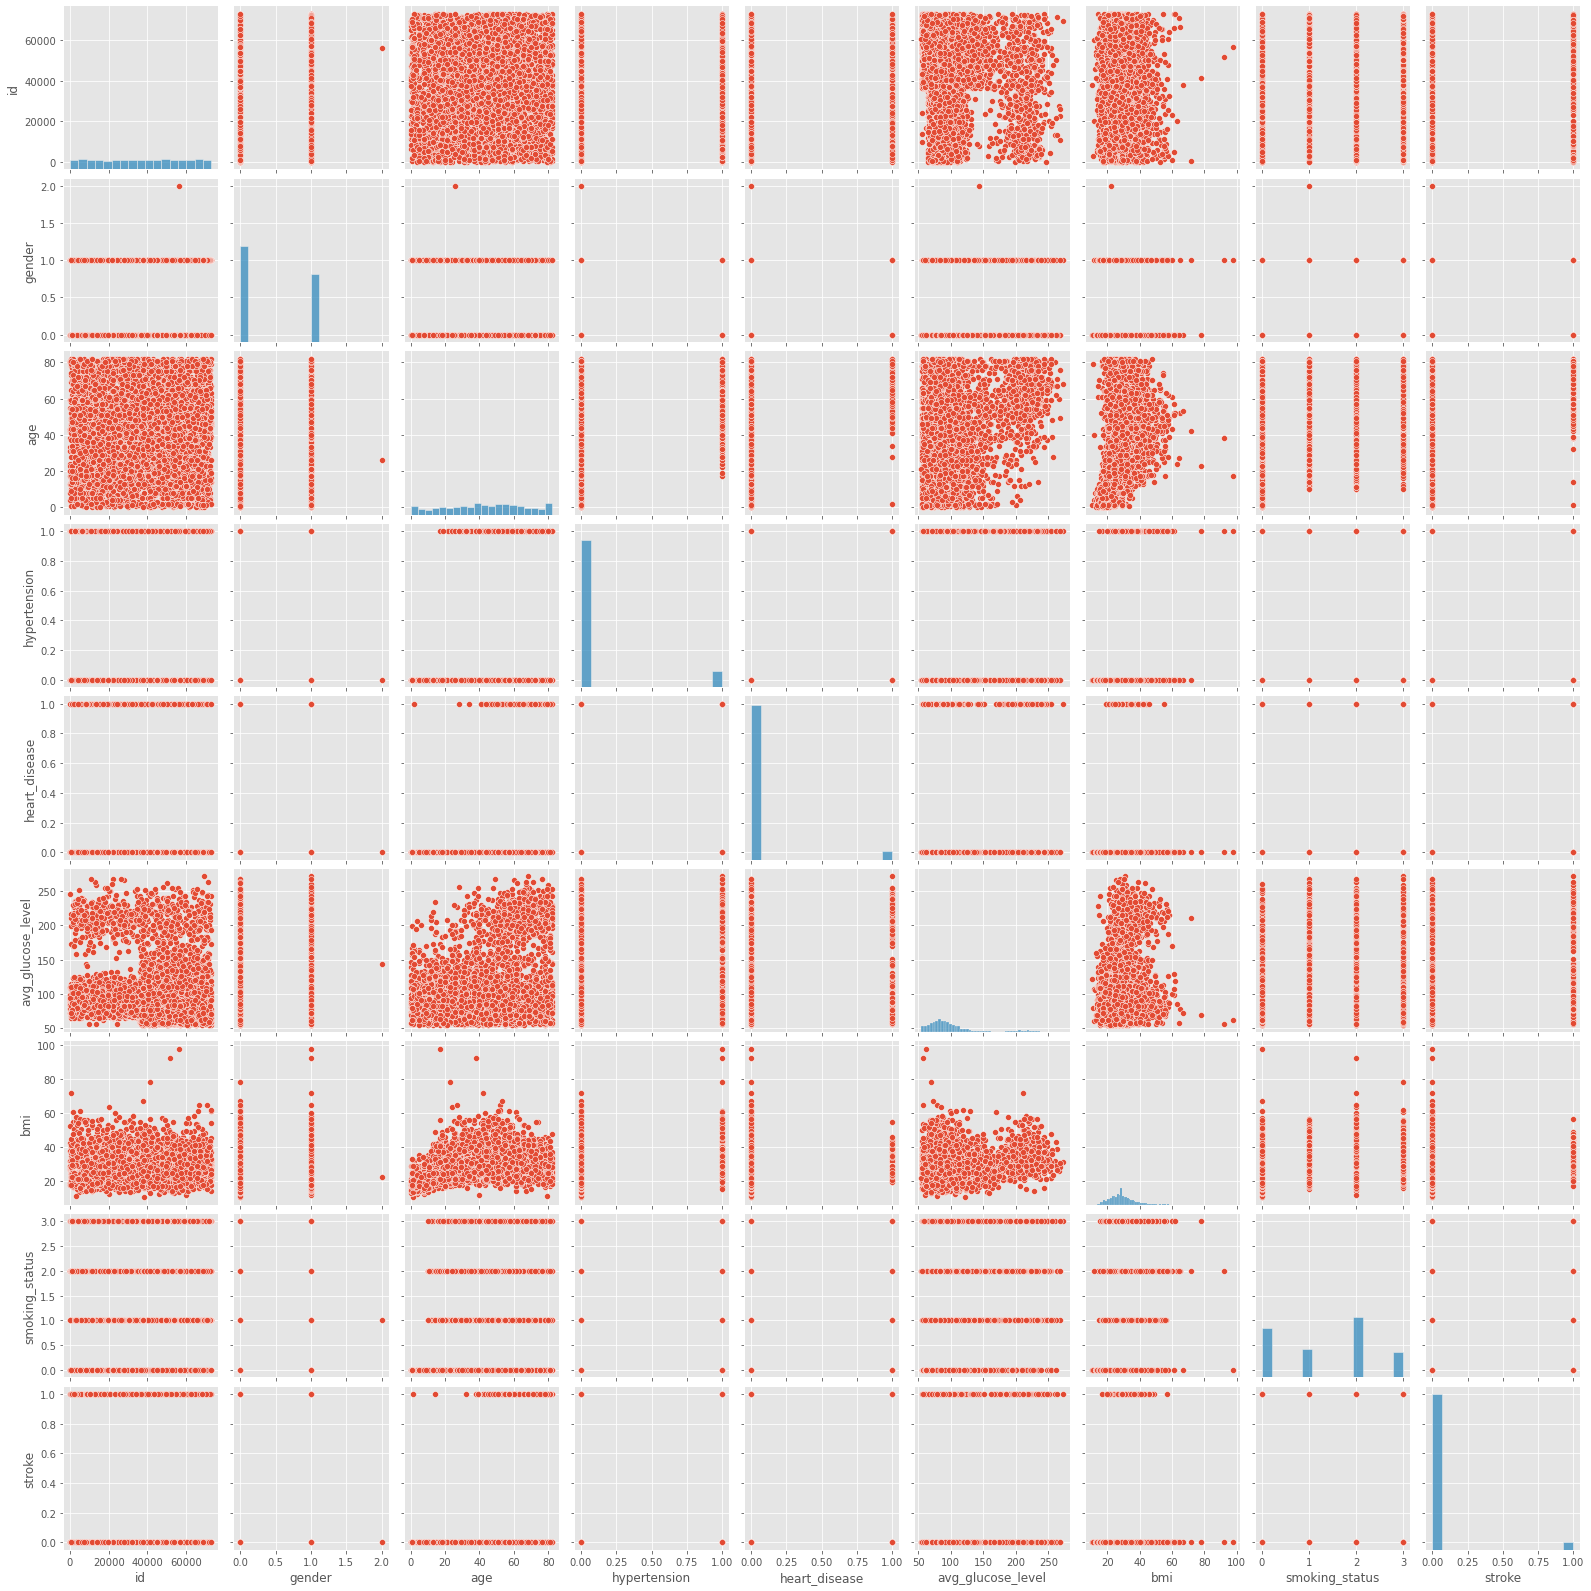

In [681]:
# Below function visualizes given data to find the relationship between them where the variables can be continuous or categorical. 
sns.pairplot(df)

#### Model Train and Scaling
We consider some of the important input features from the input data which are useful for predicting the output. We also scale the input the data before the fitting the data using the defined model.

In [682]:
# X holds the assumed features which would be useful in predicting if the person is prone to stroke or not. 
# And y is output feature which is our predicted variable.

df
X = df[[ 'avg_glucose_level', 'age', 'bmi', 'smoking_status']]
y = df['stroke']

In [683]:
# Splitting the Data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [684]:
# Scaling : Scaling is a method used to normalize the range of independent variables or features of data.
# For Example :— if you have multiple independent variables like age, bmi, and glucose_level, With their range as (18–100 Years), (10-100 ), and (10–1000 ) respectively.
# Feature scaling would help them all to be in the same range, for example- centered around 0 or in the range (0,1) depending on the scaling technique.
# There are different scalers available in sk-learn namely StandardScaler, MinMaxScaler. For Logistic Regression, We are using MinMaxScaler. 

scaler = MinMaxScaler()

X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [685]:
# Fitting the data using predefined function Logistic Regression from sk-learn library  
model = LogisticRegression(max_iter=10000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=10000)

#### Evaluation methods and metrics for classifier
* Confusion Matrix :
The confusion matrix is a way to summarize how the model performed. It is a square matrix whose size is the same as the number of different output labels. In sklearn, the rows correspond to the observed or the actual labels and the columns correspond to the labels predicted by the model. The diagonal elements in the matrix contain the number of data instances that were correctly classified by the model, while the other entries contain the number of data instances that were misclassified by the model.

We use the confusion matrix to define the below different measures.

* Accuracy :
Accuracy is the percentage of correct predictions.
    
    Accuracy = TP + TN / TP + TN + FP + FN

* Precision :
Precision is the percentage of the positive predictions which are correct.
    
    Precision = TP / TP + FP 

* Recall :
Recall is the percentage of positive observations that were correctly classified.
    
    Recall = TP / TP + FN 

* F1-Score :
F1-score is defined, for each class, as the harmonic average of the recall and the precision
    
    F1 = 2 * Recall / Precision Recall + Precision



In [686]:
# Training Accuracy of the model
model.score(X_train_scaled, y_train)

0.9483298538622129

In [687]:
# Testing Accuracy of the model
model.score(X_test_scaled, y_test)

0.960093896713615

In [688]:
# Predicted output of the test set 
y_predicted = model.predict(X_test_scaled)
y_predicted

array([0, 0, 0, ..., 0, 0, 0])

In [689]:
# Confusion Matrix of the model 
confusion_matrix(y_test, y_predicted)
cm = confusion_matrix(y_test, y_predicted)
cm

array([[1227,    0],
       [  51,    0]])

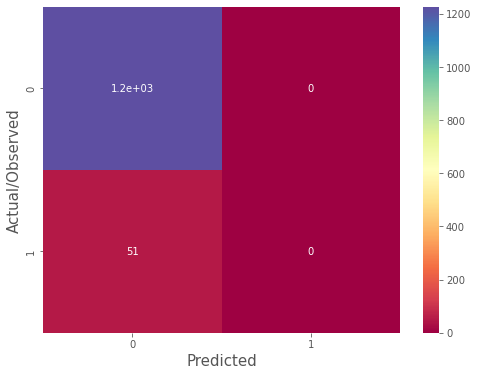

In [690]:
# Plotting the heat map 
plt.figure(figsize = (8,6))
sns.heatmap(cm, annot=True, cmap = "Spectral")
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual/Observed', fontsize=12);

In [691]:
# Classification Report : This report explains all the evaluation metrics of the classifier in detail 
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1227
           1       0.00      0.00      0.00        51

    accuracy                           0.96      1278
   macro avg       0.48      0.50      0.49      1278
weighted avg       0.92      0.96      0.94      1278



/Users/psameer/opt/anaconda3/envs/cis6397/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/psameer/opt/anaconda3/envs/cis6397/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/psameer/opt/anaconda3/envs/cis6397/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

#### Naive Bayes Classifier 

* What is Naive Bayes Algorithm ?

NB is a supervised machine learning algorithm used for classification and it has a wide range of applications such as sentiment analysis, text categorization, recommendation systems, etc. 
In this project, We are making use of Gaussian NB classifier because of the following reason:

– Gaussian NB : features are continuous and follow the Gaussian distribution. If a continuous feature does not follow a Gaussian distribution, use some transformation to convert it to Gaussian distribution.

* How does this Algorithm works ?

Algorithms that learn P(y|x), the conditional probability of the target variable given the input features, directly by using a discriminative function (such as logistic regression using sigmoid function) or algorithms that try to learn mappings from the input space to the set of labels (such as perceptron) are called discriminative learning algorithms. Instead of modeling P(y|x), generative learning algorithms model P(x|y). 

* Why this Algorithm ?

Very simple and easy to implement, Fast, When assumption of conditional independence holds, Naive Bayes performs better compared to other models, Needs less training data.


In [692]:
# Importing additional libraries that are necessary
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_predict, cross_validate
from sklearn.preprocessing import StandardScaler

In [693]:
# X holds the assumed features which would be useful in predicting if the person is prone to stroke or not. 
# And y is output feature which is our predicted variable.
X = df[[ "age", "heart_disease", "avg_glucose_level", "bmi", "smoking_status", "hypertension"]]
y = df["stroke"]

In [694]:
# Fitting the data using a predefined function related to Naive Bayes from sk-learn library
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

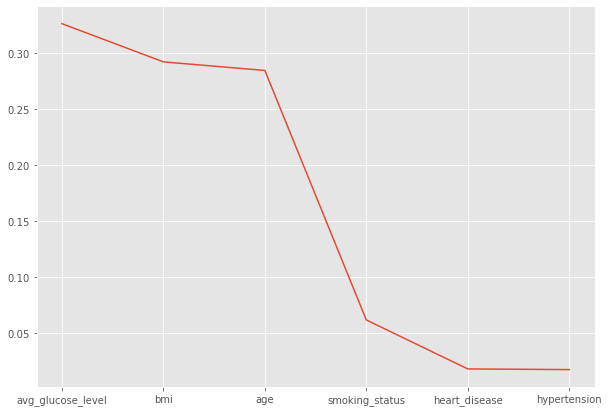

In [695]:
# Finding the most important features which are most helpful in predicting the output and visualizing it in the form of graph 
plt.style.use('ggplot')
plt.figure(figsize=(10,7))
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(50).plot(kind='line')
plt.show()

<AxesSubplot:>

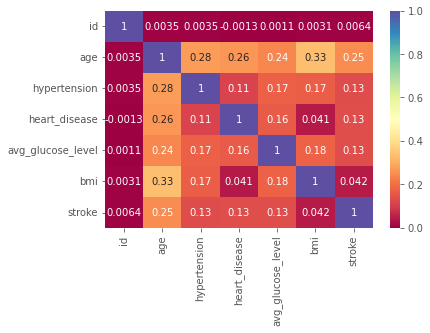

In [707]:
# Plotting the heat map
sns.heatmap(df.corr(), annot = True, cmap="Spectral")

In [697]:
# From the above graph it is evident that below are the three features which are really helpful to accurately predict the output, Hence considering only
# these three features and training the algorithm with these three alone.
X =  df[['avg_glucose_level', 'bmi', 'age']]
y = df['stroke']

In [698]:
# Splitting the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [699]:
# Scaling : We are making use of StandardScaler for this part of the project.

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [700]:
# Fitting the data using Gaussian Naive Bayes Classifier  
model = GaussianNB()
model.fit(X_train_scaled, y_train)

GaussianNB()

In [701]:
# Predicted output of the test set 
y_pred = model.predict(X_test_scaled)
y_pred

In [702]:
# Accuracy on the test set
print("Accuracy: ",accuracy_score(y_test, y_pred))

Accuracy:  0.9148727984344422


In [703]:
# Confusion Matrix of the model 
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

Confusion Matrix: 
 [[928  35]
 [ 52   7]]


In [704]:
# Classification Report of the model
print("Classification Report: ")
print(classification_report(y_test, y_pred))

Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       963
           1       0.17      0.12      0.14        59

    accuracy                           0.91      1022
   macro avg       0.56      0.54      0.55      1022
weighted avg       0.90      0.91      0.91      1022



In [705]:
# Randomly picking some values of taken input and testing if the algorithm is able to predict the heart stroke 
model.predict([[228.69,36.600,67.0]])

array([1])

#### Comparing the differences observed between Logistic Regression and Naive Bayes Algorithms 

* Logistic Regression was unable to predict the True Negatives but Naive Bayes was able to predict the both the True positives and True Negatives.

* Even though the accuracy obtained in NB is less when compared to Logistic Regression, NB was able to classify the true negatives. 